## Lecture 17 ##

**Name:** Maxwell Fazen

**NetID:** mfazen2

**Exercise 1:**

(a)

In [1]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import PIL
#im = plt.imshow(mons,origin="lower")


(b)

(3240, 3380)


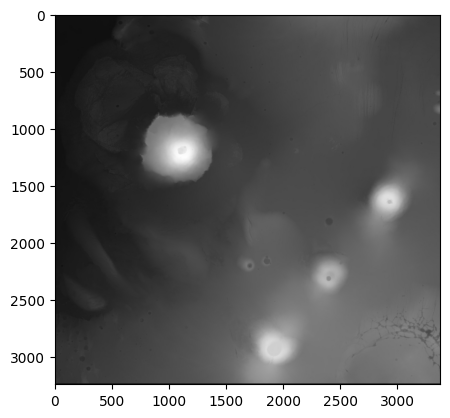

In [2]:
mons=plt.imread("Olympus_Mons_MOLA_64ppd.jpg")
sum = np.sum(mons,axis=2)
print(sum.shape)
max = np.max(sum)
min = np.min(sum)
scaled = -5664 + (21185+5664)*(sum-min) / (max-min)
plt.imshow(mons)

(c)

In [3]:
gridspace = (2*np.pi*np.cos(11.875*(np.pi/180))*3389.5)/(64*360)
print(gridspace)
print("The extent of the image is:", sum.shape[0]*gridspace, "by", sum.shape[1]*gridspace, "km")


0.904560751137566
The extent of the image is: 2930.776833685714 by 3057.415338844973 km


(d)

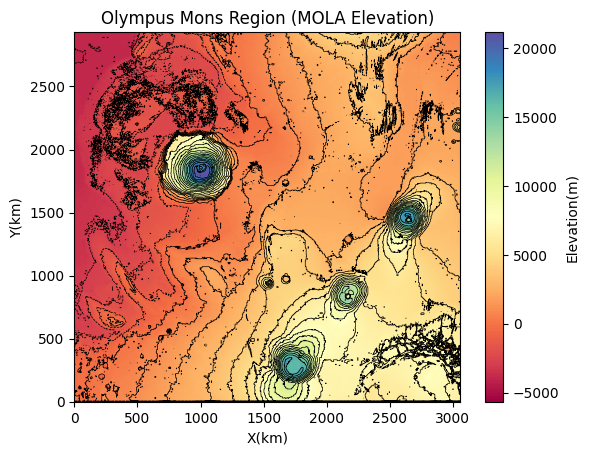

In [16]:
yextent=sum.shape[0]*gridspace
xextent=sum.shape[1]*gridspace
import matplotlib.cm

plt.imshow(scaled,extent=[0,xextent,0,yextent],cmap="Spectral")
plt.colorbar(label="Elevation(m)")
plt.xlabel("X(km)")
plt.ylabel("Y(km)")
plt.title("Olympus Mons Region (MOLA Elevation)")

conlvl = np.arange(-5000,21000,1000)
plt.contour(scaled,conlvl,extent=[0,xextent,0,yextent],origin="upper",colors="black",linewidths=0.5)



## Exercise 2: ##

(a)

In [22]:
import astropy
from astropy.io import ascii
from astropy import units as u
from astropy import coordinates as coord
from astropy.table import MaskedColumn
pulsar = astropy.io.ascii.read("atnf_pulsars_20200112.dat",header_start=2,data_start=3,delimiter="|")
pulsar

col0,name,ra,dec,period,period_error,period_dot,period_dot_error,dm,dm_error,flux_1400_mhz,flux_1400_mhz_error,spect_index,spect_index_error,a1,a1_error,eccentricity,eccentricity_error,min_mass,median_mass,companion_type,mass_ratio,mass_ratio_error,distance,pulsar_type,age,b_surf,transverse_velocity,_1
int32,str16,str13,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str11,float64,float64,float64,int32
--,PSR J1036-8317,10 36 00.0000,-83 17 00.000,0.003408,0.0,--,--,27.0,0.0,--,--,--,--,0.506,0.0,--,--,0.1401,0.1635,He,--,--,0.93,HE,--,--,--,--
--,PSR J0211-8159,02 11 59.0000,-81 59 36.200,1.0773327013,8e-10,2.9e-16,2e-17,24.36,0.03,0.3,0.1,--,--,--,--,--,--,--,--,--,--,--,1.52,R,58900000.0,566000000000.0,--,--
--,PSR J1900-7951,19 00 24.4000,-79 51 48.200,1.2791931935,6e-10,1.86e-15,3e-17,39.0,5.0,--,--,--,--,--,--,--,--,--,--,--,--,--,2.37,R,10900000.0,1560000000000.0,--,--
--,PSR J1119-7936,11 19 40.8000,-79 36 30.300,2.2805971963,7e-10,3.67e-15,4e-17,27.4,1.4,0.7,0.1,--,--,--,--,--,--,--,--,--,--,--,0.81,R,9850000.0,2930000000000.0,--,--
--,PSR J1057-7914,10 57 27.4000,-79 14 24.200,1.3474021612,4e-10,1.327e-15,1.6e-17,51.0,2.0,0.6,0.1,--,--,--,--,--,--,--,--,--,--,--,1.44,R,16100000.0,1350000000000.0,--,--
--,PSR J1159-7910,11 59 35.7100,-79 10 05.600,0.5250742392,3e-10,2.817e-15,6e-18,59.24,0.02,0.7,0.2,-2.0,1.0,--,--,--,--,--,--,--,--,--,1.61,R,2950000.0,1230000000000.0,--,--
--,PSR J1841-7845,18 41 25.9000,-78 45 15.000,0.3536025329,4e-10,1.6e-16,7e-17,41.0,2.0,0.4,0.1,--,--,--,--,--,--,--,--,--,--,--,2.46,R,35000000.0,241000000000.0,--,--
--,PSR J1403-7646,14 03 04.1000,-76 46 57.500,1.306197812,8e-10,1.204e-15,1.6e-17,100.6,0.1,0.8,0.2,--,--,--,--,--,--,--,--,--,--,--,5.31,R,17200000.0,1270000000000.0,--,--
--,PSR J1651-7642,16 51 07.8700,-76 42 39.500,1.75531107981,1.8e-10,1.363e-15,8e-18,80.0,10.0,0.7,0.1,--,--,--,--,--,--,--,--,--,--,--,9.23,R,20400000.0,1570000000000.0,--,--


(b)

In [27]:
A = coord.SkyCoord(pulsar['ra'],pulsar['dec'],pulsar['distance'],unit=("hour","deg","kpc"))
A

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(159.        , -83.28333333, 0.93),
     ( 32.99583333, -81.99338889, 1.52),
     (285.10166667, -79.86338889, 2.37), ...,
     (200.44013125,  83.39428667, 1.09),
     (357.76373375,  85.55572222, 2.62),
     (246.13633333,  86.72033611, 8.85)]>

(c)

In [32]:
A = A.transform_to("galactocentric")
A

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    [( -7.70444385, -0.75744087, -0.32103686),
     ( -7.50637384, -1.08789292, -0.84402728),
     ( -6.65017507, -1.50988363, -1.06130962), ...,
     ( -8.59960834,  0.77022853,  0.6263682 ),
     ( -9.38741464,  2.05497125,  1.0406782 ),
     (-11.97021951,  6.7047189 ,  4.32896042)]>

(d)

In [34]:
binary = (pulsar["companion_type"]).mask
notbinary = ~binary


(e)

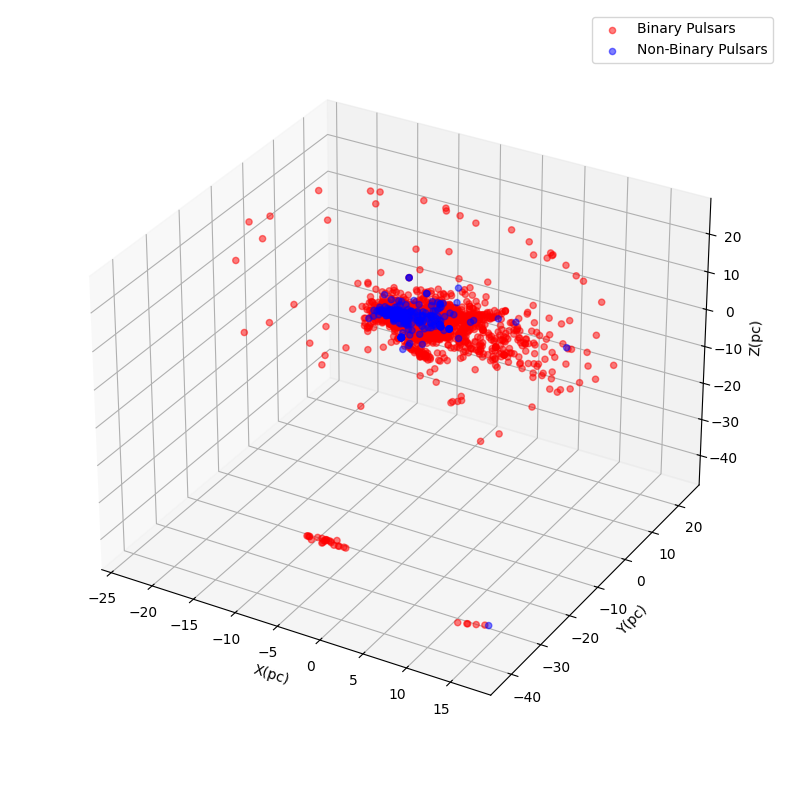

In [53]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
pulsbin = A[binary]

pulslone= A[notbinary]
ax.scatter(pulsbin.x,pulsbin.y,pulsbin.z,color="red",alpha=0.5,label = "Binary Pulsars")
ax.scatter(pulslone.x,pulslone.y,pulslone.z,color="blue",alpha=0.5,label = "Non-Binary Pulsars")
ax.set_xlabel("X(pc)")
ax.set_ylabel("Y(pc)")
ax.set_zlabel("Z(pc)")
ax.set_box_aspect(aspect=None,zoom=0.9)
ax.legend()
plt.show()

(f)

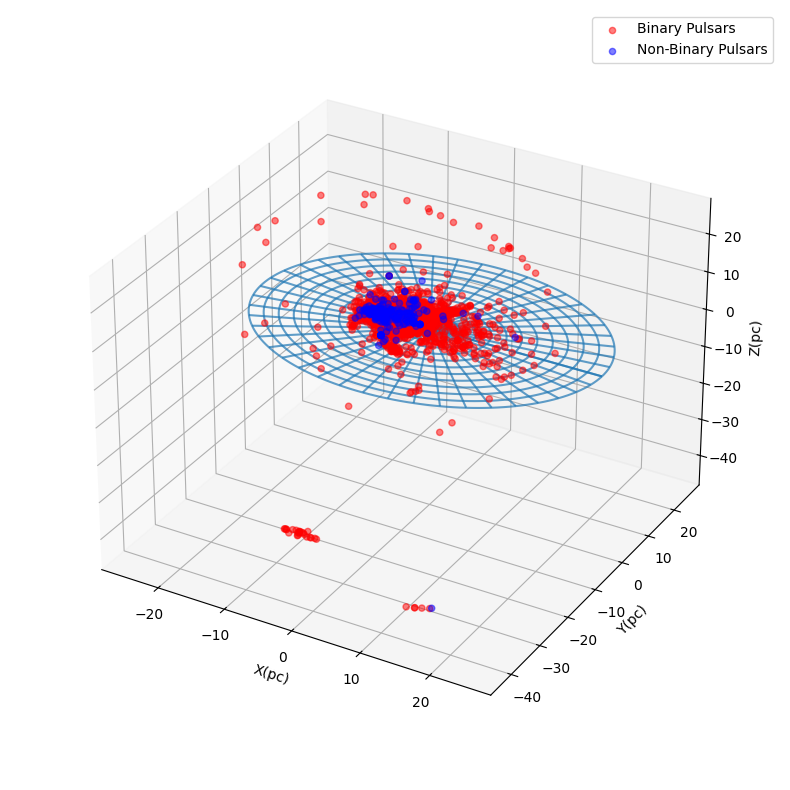

In [62]:
r = np.linspace(0,25,13)
theta = np.linspace(0,2*np.pi,181)
r,theta = np.meshgrid(r,theta)
x=r*np.cos(theta)
y= r*np.sin(theta)
z=np.zeros_like(x)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d',computed_zorder=False)
ax.scatter(pulsbin.x,pulsbin.y,pulsbin.z,color="red",alpha=0.5,label = "Binary Pulsars")
ax.scatter(pulslone.x,pulslone.y,pulslone.z,color="blue",alpha=0.5,label = "Non-Binary Pulsars")
ax.plot_wireframe(x,y,z,zorder=0,alpha=0.7)
ax.set_xlabel("X(pc)")
ax.set_ylabel("Y(pc)")
ax.set_zlabel("Z(pc)")
ax.set_box_aspect(aspect=None,zoom=0.9)
ax.legend()

plt.show()
